In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
data = pd.read_csv('predict_energy_consumption.csv')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [4]:
X = data[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']].values
y = data['energy_consumption'].values

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [9]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 94416.7422 - mae: 280.0881 - val_loss: 83603.1875 - val_mae: 258.8305
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 91550.7734 - mae: 273.9824 - val_loss: 82983.6328 - val_mae: 257.6238
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 86804.5781 - mae: 266.1683 - val_loss: 81929.1484 - val_mae: 255.5596
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 87543.1016 - mae: 265.6875 - val_loss: 80277.0312 - val_mae: 252.2858
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84078.8828 - mae: 259.8864 - val_loss: 77900.7969 - val_mae: 247.4987
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88331.5156 - mae: 267.6588 - val_loss: 74645.8516 - val_mae: 240.7820
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82891.3828 - mae: 256.6623 - val_loss: 70512.8906 - val_mae: 231.9551
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 74920.0391 - mae: 242.0421 - val_loss: 65345.

In [10]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18104.0176 - mae: 115.5301  
Test Mean Absolute Error: 115.58


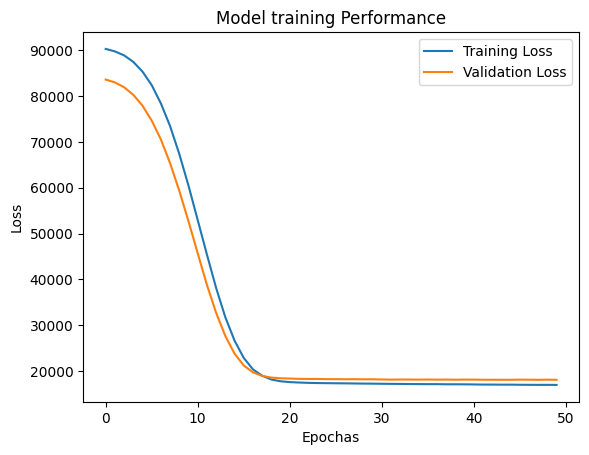

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochas')
plt.ylabel('Loss')
plt.title('Model training Performance')
plt.legend()
plt.show()

In [13]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


array([[283.99603],
       [249.55437],
       [258.5043 ],
       [208.12056],
       [343.32382],
       [313.3468 ],
       [316.4257 ],
       [288.3579 ],
       [296.8698 ],
       [274.977  ],
       [242.61607],
       [261.96786],
       [274.71255],
       [228.14514],
       [301.57175],
       [321.4955 ],
       [255.20221],
       [309.9095 ],
       [302.9572 ],
       [250.85484],
       [267.63867],
       [279.8236 ],
       [272.2502 ],
       [263.1383 ],
       [253.37355],
       [247.24733],
       [262.48712],
       [306.64307],
       [322.02344],
       [263.66837],
       [233.97179],
       [310.31476],
       [295.63116],
       [269.79248],
       [317.86102],
       [285.51083],
       [213.57368],
       [253.88008],
       [280.8846 ],
       [238.68883],
       [251.0294 ],
       [253.08424],
       [250.48105],
       [253.8106 ],
       [271.01144],
       [251.80272],
       [267.07538],
       [258.09625],
       [301.4194 ],
       [292.79816],


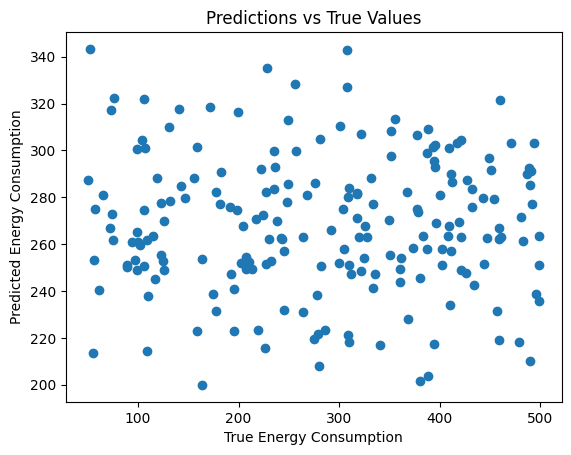

In [14]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()